<a href="https://colab.research.google.com/github/moeed17/Signal_Analysis/blob/main/AudioAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Adversarial Audio Example**

The following cells executes a simple code to perform a signal anlaysis on audio signal before and after perturbation. The audio files or wav files used here are taken from Nicolas Carlini's website of his work on imperceptible audio adversarial attacks.
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [1]:
#importing necessary module/libraries
import numpy as np 
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib import style
import IPython.display as ipd
import scipy
from scipy import stats
from scipy.fft import fft, fftfreq
from scipy.io import wavfile

In [2]:
#cloning the repository to import audio samples
!git clone https://github.com/moeed17/Signal_Analysis.git

Cloning into 'Signal_Analysis'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), 1.21 MiB | 2.53 MiB/s, done.


In [3]:
#setting the style of background for audio signal
plt.style.use('seaborn-dark-palette')

In [4]:
#importing clean audio
clean_audio_data = '/content/Signal_Analysis/20db_clean.wav'
data,sr = librosa.load(clean_audio_data, sr=None)
print("Sampling rate of this audio is:",sr,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [5]:
# function to convert the information into some readable format
def output_duration(length):
    hours = length // 3600      # calculate in hours
    length %= 3600
    mins = length // 60         # calculate in minutes
    length %= 60
    seconds = length            # calculate in seconds
    return hours, mins, seconds

# **Clean audio analysis**

In [6]:
# In 1 sec we have 16000 samples so in order to calculate time of recording
# we will divide totalSamples / samples in one sec.
totalSamples = len(data)
time = totalSamples / sr
hours, mins, seconds = output_duration(int(time))
print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))

Total Duration: 0:0:3


In [7]:
ipd.Audio(clean_audio_data, rate = sr)

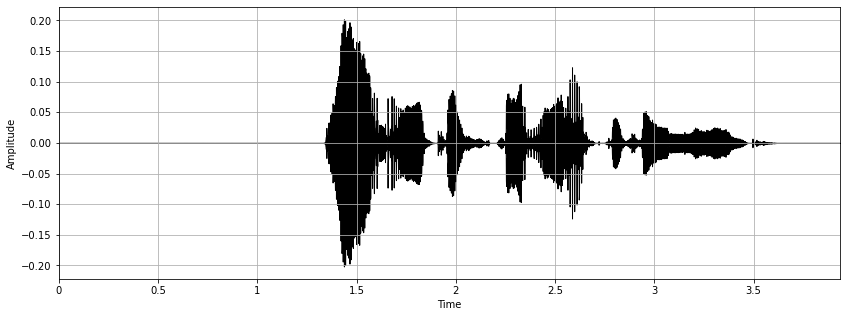

In [8]:
#plotting clean audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sr, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [9]:
#calculating zero crossing value of clean signal
zero_crossings = librosa.zero_crossings(data, pad=False)
print(sum(zero_crossings))

5022


Maximum or last frequency bins is = 16000


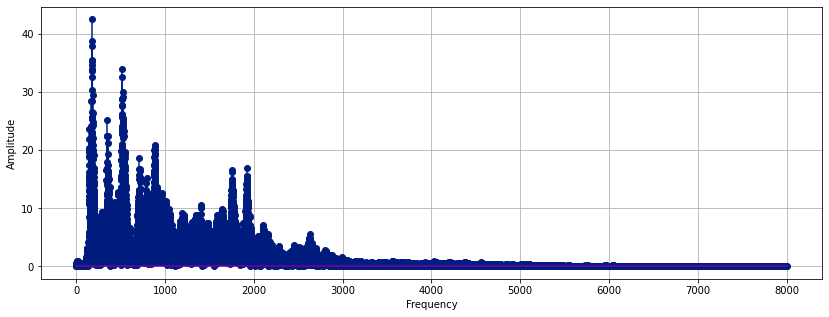

In [10]:
#plotting fourier transform of clean audio wave
xft = fft(data)
N = len(xft)
n = np.arange(1,N+1)        #preparing bins of the frequency axis
res = sr/N                  #samples per sec / samples = frequency resolution
freq = n*res                #getting out frequency axis
plt.figure(figsize=(14, 5))
print("Maximum or last frequency bins is =",int(freq[-1])) #'int' used here to compensate for error
plt.stem(freq[:int(len(freq)/2)], np.abs(xft)[:int(len(freq)/2)]) #not plotting alias part of spectrum
plt.xlabel("Frequency"), plt.ylabel("Amplitude")
plt.grid()

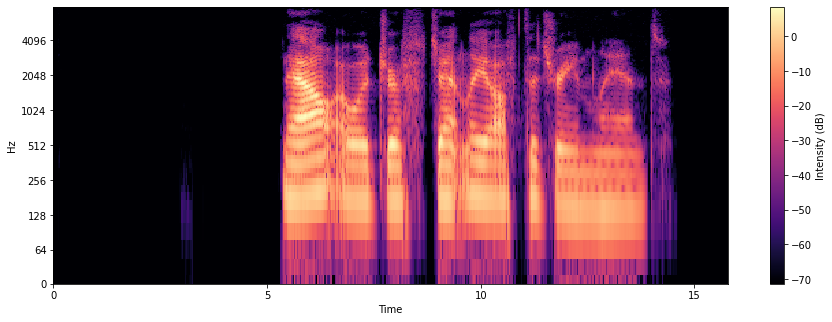

In [11]:
#plotting spectrogram of clean audio wave
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
DBstft = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15.1, 5.1))
librosa.display.specshow(DBstft, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.show()

# **Perturbed audio analysis**

In [12]:
#importing perturbed audio
perturbed_audio_data = '/content/Signal_Analysis/20db_perturbed.wav'
dataPert,srPert = librosa.load(perturbed_audio_data, sr=None)
print("Sampling rate of this audio is:",srPert,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [13]:
ipd.Audio(perturbed_audio_data)

# **Distortion Metric Implementation from paper**

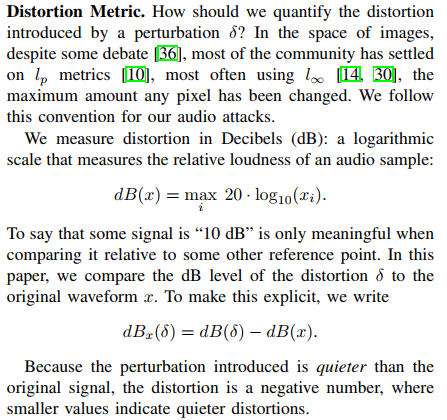

In [14]:
#creating function of metric
def Metricsnr(original, noisy):
    original_power = 20 * np.log10(np.mean(original ** 2))
    noise_power = 20 * np.log10(np.mean((original - noisy) ** 2))
    snr = noise_power - original_power
    return snr

In [15]:
SNR = Metricsnr(data,dataPert)
print("The SNR of signal is", SNR)

The SNR of signal is -25.085201263427734


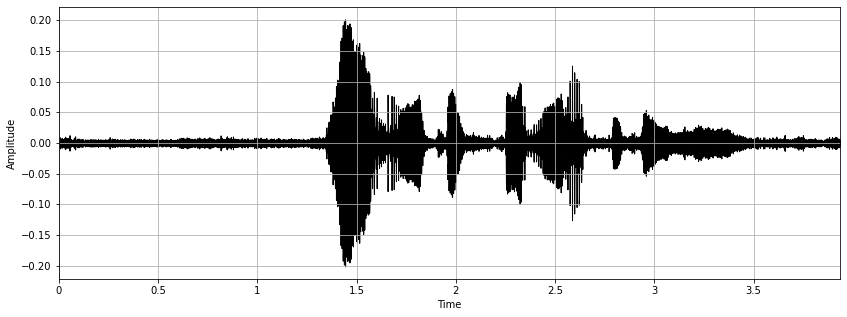

In [16]:
#plotting perturbed audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(dataPert, sr=srPert, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [17]:
#calculating zero crossing value of perturbed signal
zero_crossingsPert = librosa.zero_crossings(dataPert, pad=False)
print(sum(zero_crossingsPert))

15472


Maximum or last frequency bins is = 16000


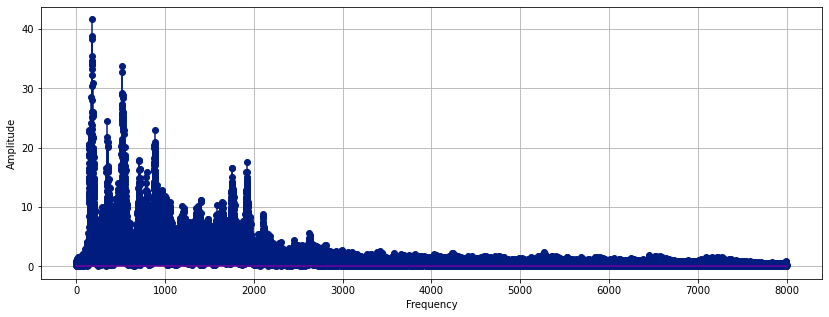

In [18]:
#plotting fourier transform of perturbed audio wave
xftPert = fft(dataPert)
NPert = len(xftPert)
nPert = np.arange(1,N+1)        #preparing bins of the frequency axis
resPert = sr/N                  #samples per sec / samples = frequency resolution
freqPert = n*res                #getting out frequency axis
plt.figure(figsize=(14, 5))
print("Maximum or last frequency bins is =",int(freqPert[-1])) #'int' used here to compensate for error
plt.stem(freqPert[:int(len(freqPert)/2)], np.abs(xftPert)[:int(len(freqPert)/2)]) #not plotting alias part of spectrum
plt.xlabel("Frequency"), plt.ylabel("Amplitude")
plt.grid()

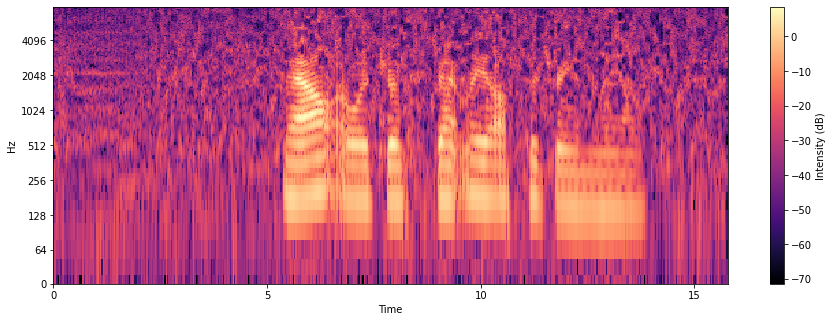

In [19]:
#plotting spectrogram of perturbed audio wave
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'
stftPert = librosa.stft(dataPert, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
DBstftPert = librosa.amplitude_to_db(abs(stftPert))
plt.figure(figsize=(15.1, 5.1))
librosa.display.specshow(DBstftPert, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.show()

# **Imperceptible Perturbed audio analysis**

Following cells executes the same code but this time its Carlini's "imperctible" attack. The audio files are downloaded from his research paper referenced website (the very first 2 examples)
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [20]:
#importing clean audio
carlini_clean_audio_data = '/content/Signal_Analysis/clean.wav'
cleanData,cleanSr = librosa.load(carlini_clean_audio_data, sr=None)
print("Sampling rate of this audio is:",cleanSr,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [21]:
# In 1 sec we have 16000 samples so in order to calculate time of recording
# we will divide totalSamples / samples in one sec.
totalSamples = len(cleanData)
time = totalSamples / cleanSr
hours, mins, seconds = output_duration(int(time))
print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))

Total Duration: 0:0:3


In [22]:
ipd.Audio(carlini_clean_audio_data)

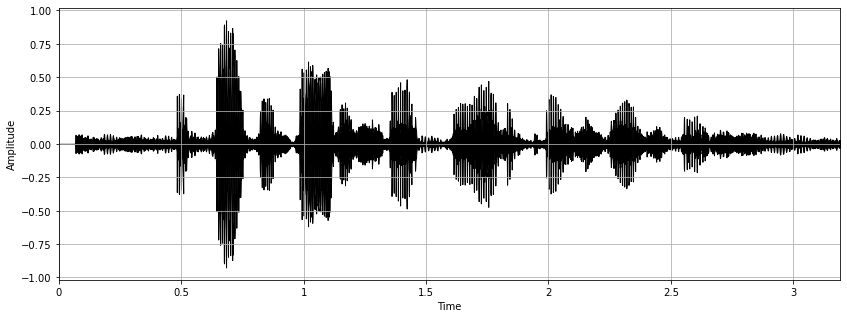

In [23]:
#plotting clean audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(cleanData, sr=cleanSr, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [24]:
#calculating zero crossing value of clean signal
zero_crossingsPert = librosa.zero_crossings(cleanData, pad=False)
print(sum(zero_crossingsPert))

6211


Maximum or last frequency bins is = 16000


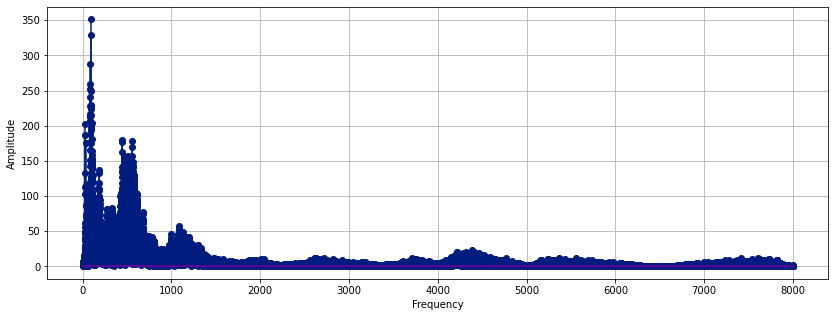

In [25]:
#plotting fourier transform of clean audio wave
xftImp = fft(cleanData)
NImp = len(xftImp)
nImp = np.arange(1,N+1)        #preparing bins of the frequency axis
resImp = sr/N                  #samples per sec / samples = frequency resolution
freqImp = n*res                #getting out frequency axis
plt.figure(figsize=(14, 5))
print("Maximum or last frequency bins is =",int(freqImp[-1])) #'int' used here to compensate for error
plt.stem(freqImp[:int(len(freqImp)/2)], np.abs(xftImp)[:int(len(freqImp)/2)]) #not plotting alias part of spectrum
plt.xlabel("Frequency"), plt.ylabel("Amplitude")
plt.grid()

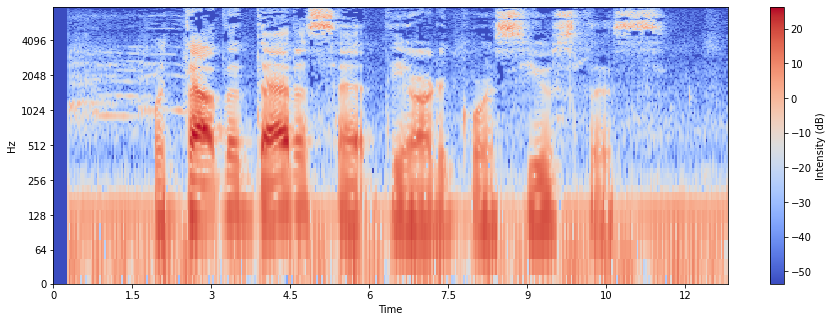

In [26]:
#plotting spectrogram of clean audio wave
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'
stftImp = librosa.stft(cleanData, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
DBstftImp = librosa.amplitude_to_db(abs(stftImp))
plt.figure(figsize=(15.1, 5.1))
librosa.display.specshow(DBstftImp, sr=cleanSr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")

In [27]:
#importing clean audio
carlini_clean_audio_data = '/content/Signal_Analysis/clean.wav'
cleanData,cleanSr = librosa.load(carlini_clean_audio_data, sr=None)
print("Sampling rate of this audio is:",cleanSr,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [28]:
#importing imperceptible perturbed audio
carlini_perturbed_audio_data = '/content/Signal_Analysis/perturbed.wav'
cleanDataPert,cleanSrPert = librosa.load(carlini_perturbed_audio_data, sr=None)
print("Sampling rate of this audio is:",cleanSrPert,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [29]:
ipd.Audio(carlini_perturbed_audio_data)

In [30]:
SNRImp = Metricsnr(cleanData,cleanDataPert)
print("The SNR of signal is ", SNRImp)

The SNR of signal is  -52.94031620025635


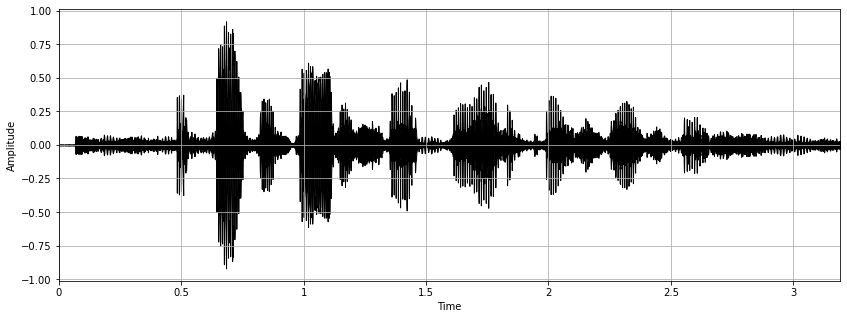

In [31]:
#plotting perturbed audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(cleanDataPert, sr=cleanSrPert, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [32]:
#calculating zero crossing value of perturbed signal
zeroCrossingsImpPert = librosa.zero_crossings(cleanDataPert, pad=False)
print(sum(zeroCrossingsImpPert))

6892


Maximum or last frequency bins is = 16000


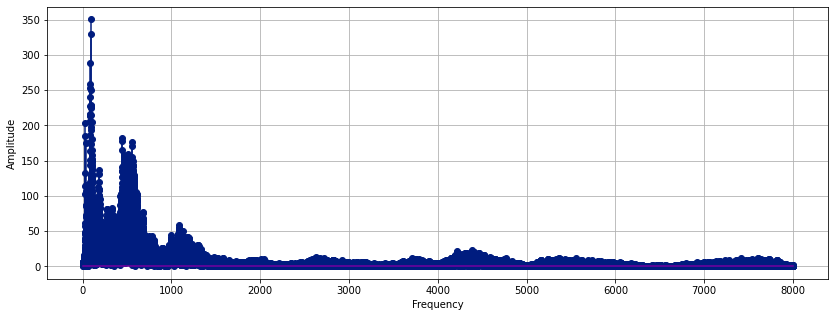

In [33]:
#plotting fourier transform of perturbed audio wave
xftPertImp = fft(cleanDataPert)
NPertImp = len(xftPertImp)
nPertImp = np.arange(1,N+1)        #preparing bins of the frequency axis
resPertImp = sr/N                  #samples per sec / samples = frequency resolution
freqPertImp = n*resPertImp                #getting out frequency axis
plt.figure(figsize=(14, 5))
print("Maximum or last frequency bins is =",int(freqPertImp[-1])) #'int' used here to compensate for error
plt.stem(freqPertImp[:int(len(freqPertImp)/2)], np.abs(xftPertImp)[:int(len(freqPertImp)/2)]) #not plotting alias part of spectrum
plt.xlabel("Frequency"), plt.ylabel("Amplitude")
plt.grid()

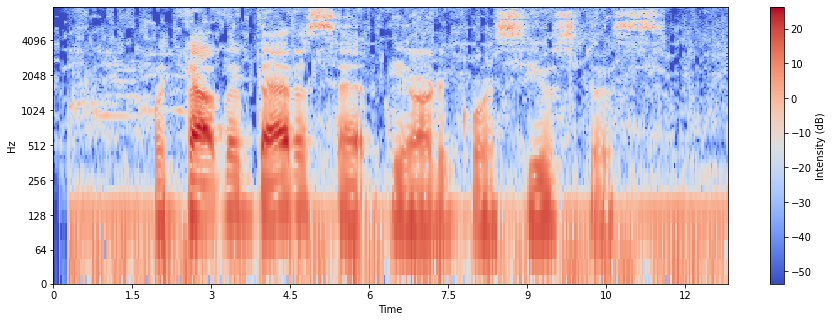

In [34]:
#plotting spectrogram of perturbed audio wave
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'
stftPertImp = librosa.stft(cleanDataPert, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
DBstftPertImp = librosa.amplitude_to_db(abs(stftPertImp))
plt.figure(figsize=(15.1, 5.1))
librosa.display.specshow(DBstftPertImp, sr=cleanSrPert, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.show()